In [1]:
import numpy as np
import torch
from train_rootspike_glm import train_glm
import matplotlib.pyplot as plt

# Train

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust4-60"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
C_syn_e_file = "handsub6_C_syn_e.npy"
C_syn_i_file = "handsub6_C_syn_i.npy"
C_den_file = "handsub6_C_den.npy"
Z_file = "spk_loc.npy"

E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:50000].flatten()
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)
Z = np.load(base_dir+cell_type+"_"+experiment+"/data/"+Z_file)

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)
Z = torch.from_numpy(Z)

In [3]:
model_type = "alpha_rootspike"
T_train = 60 * 1000 * 5
T_test = 10 * 1000 * 5
T_no = 500
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")
batch_size = 100000
iter_no = 20000
epoch_no = 15
lr = 0.001



In [4]:
train_glm(model_type, V, Z, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                device, lr, save_dir)

327


999 0.014385104179382324 0.006914234254509211 1 82
1999 0.1660076379776001 0.006664841901510954 0 60
2999 0.49387186765670776 0.006638171151280403 1 53
3999 -0.0003243684768676758 99.18696594238281 385 49319
4999 0.6953858733177185 0.005978110246360302 0 48
5999 0.8047617673873901 0.005579495802521706 1 38
6999 0.841519296169281 0.005567256826907396 2 46
7999 0.8563178777694702 0.005574632901698351 1 30
8999 0.8670364618301392 0.00565674202516675 2 43
9999 0.8813886642456055 0.0056255585514009 2 30
10999 0.8603557348251343 0.00569015322253108 3 40
11999 0.8900946378707886 0.0058443667367100716 4 36
12999 0.8813700675964355 0.005558198317885399 2 35
13999 0.8917215466499329 0.005672415718436241 1 43
14999 0.8816643357276917 0.005689790938049555 0 45
15999 0.8801411986351013 0.005932647734880447 0 58
16999 0.8828776478767395 0.005772550590336323 2 28
17999 0.8906412720680237 0.005807044450193644 2 35
18999 0.884979248046875 0.005781387910246849 0 31
19999 0.8942224383354187 0.00570311164

In [5]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub6_output.npz")

In [6]:
test = output["test"]
#C_syn_e = output["C_syn_e"]
#C_syn_i = output["C_syn_i"]
filters = output["filters"]

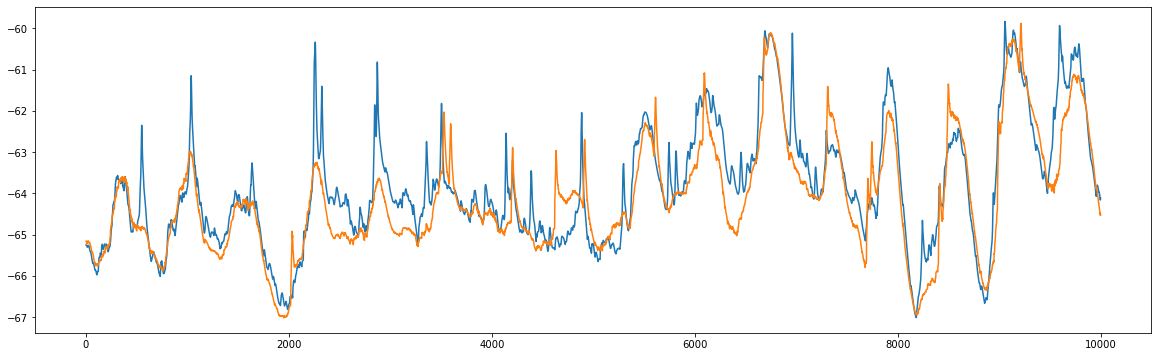

In [7]:
plt.figure(figsize = (20,6))
plt.plot(V[T_train:T_train+T_test][16000:26000][:])
plt.plot(test[16000:26000][:])


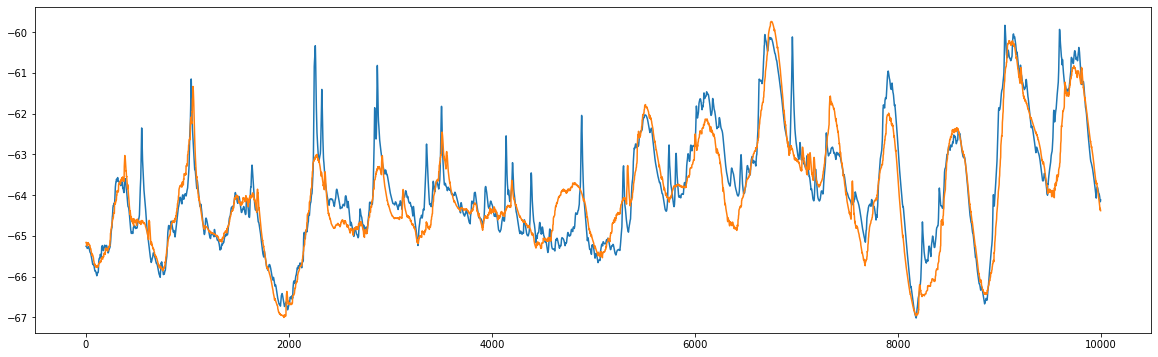

In [8]:
plt.figure(figsize = (20,6))
plt.plot(V[T_train:T_train+T_test][16000:26000][:])
plt.plot(test[16000:26000][:])


(26, 500)


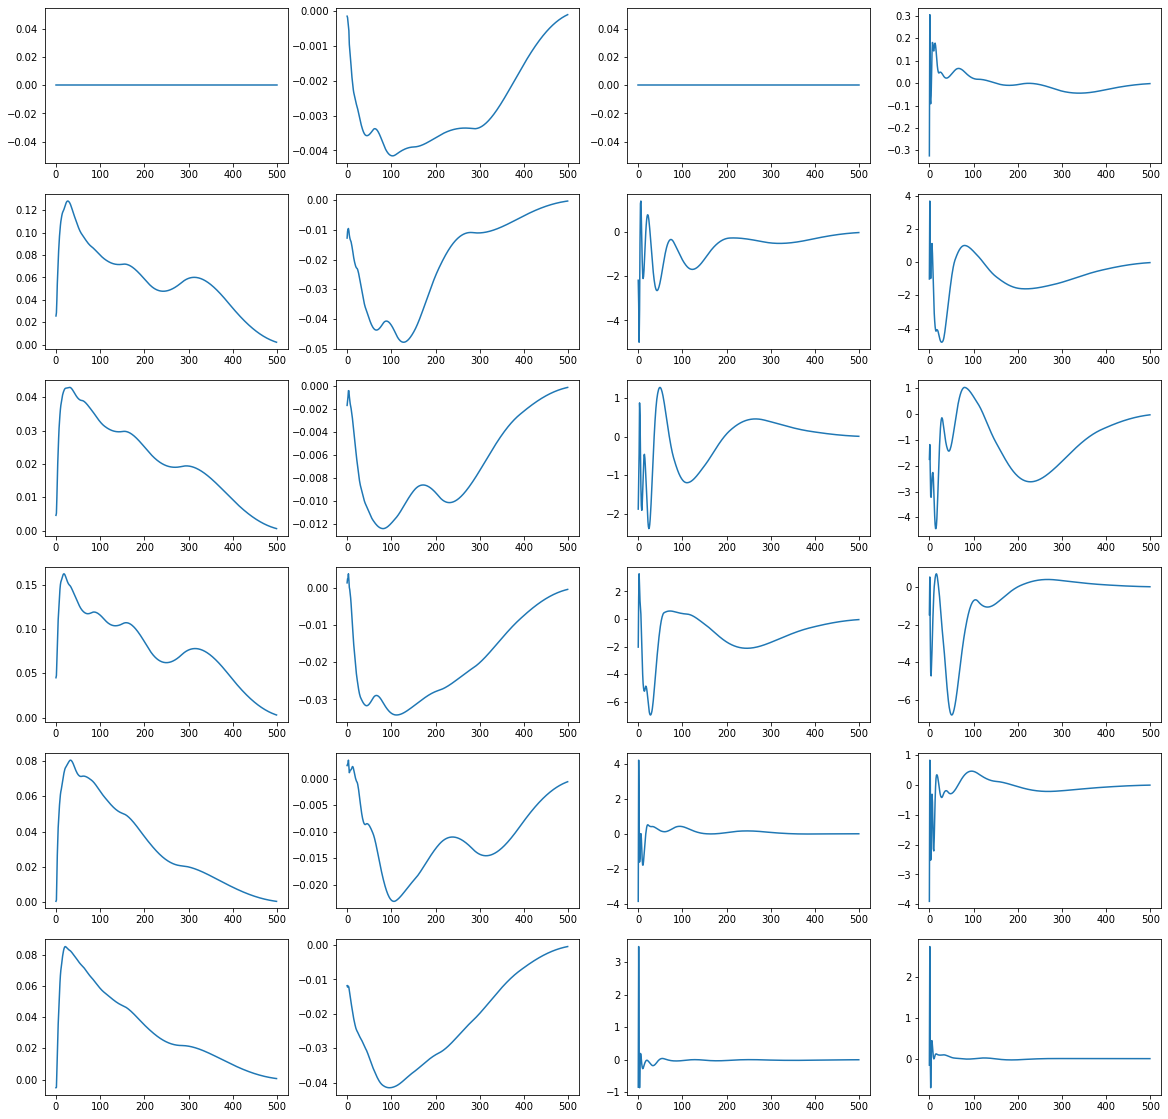

In [9]:
sub_no = 6
print(filters.shape)

fig, axs = plt.subplots(nrows=sub_no, ncols=4, figsize = (20,20))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    axs[i,2].plot(filters[2*sub_no+i][:])
    axs[i,3].plot(filters[3*sub_no+i][:])
    #axs[i,2].plot(filters[sub_no*2+i])

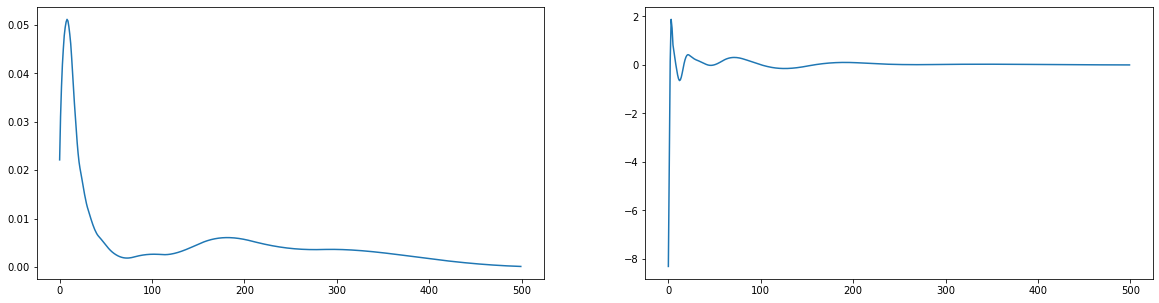

In [10]:
fig, axs = plt.subplots(ncols=2, figsize = (20,5))
axs[0].plot(filters[-2][:])
axs[1].plot(filters[-1][:])